<a href="https://colab.research.google.com/github/vijaykumarharakuni/data_analysis/blob/main/Payment_Data_Revised_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('/content/ISO20022_Large_Payment_Data_Latest.xlsx')
data.head()

data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Message Type                    5000 non-null   object        
 1   Message ID                      5000 non-null   object        
 2   Payment Amount (Currency)       5000 non-null   object        
 3   Execution Date                  5000 non-null   datetime64[ns]
 4   Intermediary Name               5000 non-null   object        
 5   Debtor Name                     5000 non-null   object        
 6   Debtor Account Number           5000 non-null   object        
 7   Creditor Name                   5000 non-null   object        
 8   Creditor Account Number         5000 non-null   object        
 9   Charges Bearer                  5000 non-null   object        
 10  Sender's Charges                5000 non-null   object        
 11  Inte

In [ ]:
data.head()

,Message Type,Message ID,Payment Amount (Currency),Execution Date,Intermediary Name,Debtor Name,Debtor Account Number,Creditor Name,Creditor Account Number,Charges Bearer,...,Intermediary Charges,Remittance Information,Status,Exchange Rate (if applicable),Purpose Code,Instruction for Creditor Agent,Creditor Address,Debtor Address,Creditor BIC,Debtor BIC
0,PACS.008,REF100000,EUR 19368.73,2025-01-03,Ball Inc,Victoria Lewis,PUPC81480687430802,Amy Daniels,BYZK78819053587504,BEN,...,EUR 20.42,CCRD,Rejected,0.9547,CCRD,TOKN,"60618 Timothy Island\nSouth Rebecca, FM 52393","9714 Hayes Throughway\nPatriciafurt, GA 62942",UBSWCHZH80A,WFBIUS6S
1,PACS.008,REF100001,USD 62508.36,2025-01-14,Hardy-Jones,Jorge Green,EMSZ86980142512720,Katherine Taylor,KIXK34220804425082,OUR,...,USD 134.56,DIVI,Rejected,0.5580,CCRD,TKSG,"671 Christopher Shoals Apt. 114\nSouth David, ...","073 Parker Mountains Apt. 049\nWest Edward, WA...",MIZBJPJT,DRESDEFF
2,PACS.009,REF100002,USD 34418.85,2025-01-25,Williamson Group,Kimberly Rivera,YJPG49156434557820,Anthony Gardner,PTVZ62668729808443,BEN,...,USD 72.85,SALA,Pending,0.9752,CCRD,VLTK,"80427 Angela Square\nDeantown, IL 24769","949 Mills Fields\nWest Steve, NY 57570",BKCHCNBJ,HLFXGB21
3,PACS.009,REF100003,GBP 9898.03,2025-01-02,Willis-Carey,Abigail Johnson,OJYL33392255840699,Christy Reese,TMAG38660992274225,SHA,...,GBP 197.92,CORT,Rejected,1.1252,CASH,RECI,"490 Martin Pine Suite 632\nWaynemouth, PR 22514","54353 Erin Station Suite 854\nJosephfurt, SD 8...",DBSSSGSG,HLFXGB21
4,PACS.009,REF100004,INR 47985.16,2025-01-27,Silva LLC,Patricia Henry,FSWL06568032089283,Jennifer Martinez,SRTF89329335706297,OUR,...,INR 139.25,DCRD,Pending,1.1432,CCRD,TOKN,"7755 Rodney Motorway\nDonnaborough, ND 07492","8253 Paul Court\nNew Danielle, TN 47571",DEUTDEFF,MIDLGB22


Big Query Connection for the getting the data

In [ ]:
from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client()

# TODO(developer): Set table_id to the fully-qualified table ID in standard
# SQL format, including the project ID and dataset ID.
table_id = "bigquery-public-data.usa_names.usa_1910_current"

# Use the BigQuery Storage API to speed-up downloads of large tables.
dataframe = client.list_rows(table_id).to_dataframe(create_bqstorage_client=True)

print(dataframe.info())

In [ ]:
data.head()
data[['Debtor Address', 'Debtor CountyPost Code']] = data["Debtor Address"].str.split('\n', expand=True)
data[['Debtor County', 'Debtor CountyPost Code']] = data["Debtor CountyPost Code"].str.split(',', expand=True)
data['Debtor State']= data["Debtor CountyPost Code"].str[0:3]
data[['Creditor Address', 'Creditor CountyPost Code']] = data["Creditor Address"].str.split('\n', expand=True)
data[['Creditor County', 'Creditor CountyPost Code']] = data["Creditor CountyPost Code"].str.split(',', expand=True)
data['Creditor State']= data["Creditor CountyPost Code"].str[0:3]
data.drop(['Debtor CountyPost Code'],axis=1,inplace=True)
data.drop(['Creditor CountyPost Code'],axis=1,inplace=True)


data.head()

,Message Type,Message ID,Payment Amount (Currency),Execution Date,Intermediary Name,Debtor Name,Debtor Account Number,Creditor Name,Creditor Account Number,Charges Bearer,...,Purpose Code,Instruction for Creditor Agent,Creditor Address,Debtor Address,Creditor BIC,Debtor BIC,Debtor County,Debtor State,Creditor County,Creditor State
0,PACS.008,REF100000,EUR 19368.73,2025-01-03,Ball Inc,Victoria Lewis,PUPC81480687430802,Amy Daniels,BYZK78819053587504,BEN,...,CCRD,TOKN,60618 Timothy Island,9714 Hayes Throughway,UBSWCHZH80A,WFBIUS6S,Patriciafurt,GA,South Rebecca,FM
1,PACS.008,REF100001,USD 62508.36,2025-01-14,Hardy-Jones,Jorge Green,EMSZ86980142512720,Katherine Taylor,KIXK34220804425082,OUR,...,CCRD,TKSG,671 Christopher Shoals Apt. 114,073 Parker Mountains Apt. 049,MIZBJPJT,DRESDEFF,West Edward,WA,South David,GA
2,PACS.009,REF100002,USD 34418.85,2025-01-25,Williamson Group,Kimberly Rivera,YJPG49156434557820,Anthony Gardner,PTVZ62668729808443,BEN,...,CCRD,VLTK,80427 Angela Square,949 Mills Fields,BKCHCNBJ,HLFXGB21,West Steve,NY,Deantown,IL
3,PACS.009,REF100003,GBP 9898.03,2025-01-02,Willis-Carey,Abigail Johnson,OJYL33392255840699,Christy Reese,TMAG38660992274225,SHA,...,CASH,RECI,490 Martin Pine Suite 632,54353 Erin Station Suite 854,DBSSSGSG,HLFXGB21,Josephfurt,SD,Waynemouth,PR
4,PACS.009,REF100004,INR 47985.16,2025-01-27,Silva LLC,Patricia Henry,FSWL06568032089283,Jennifer Martinez,SRTF89329335706297,OUR,...,CCRD,TOKN,7755 Rodney Motorway,8253 Paul Court,DEUTDEFF,MIDLGB22,New Danielle,TN,Donnaborough,ND


In [ ]:
data.head()

,Message Type,Message ID,Payment Amount (Currency),Execution Date,Intermediary Name,Debtor Name,Debtor Account Number,Creditor Name,Creditor Account Number,Charges Bearer,...,Purpose Code,Instruction for Creditor Agent,Creditor Address,Debtor Address,Creditor BIC,Debtor BIC,Debtor County,Debtor State,Creditor County,Creditor State
0,PACS.008,REF100000,EUR 19368.73,2025-01-03,Ball Inc,Victoria Lewis,PUPC81480687430802,Amy Daniels,BYZK78819053587504,BEN,...,CCRD,TOKN,60618 Timothy Island,9714 Hayes Throughway,UBSWCHZH80A,WFBIUS6S,Patriciafurt,GA,South Rebecca,FM
1,PACS.008,REF100001,USD 62508.36,2025-01-14,Hardy-Jones,Jorge Green,EMSZ86980142512720,Katherine Taylor,KIXK34220804425082,OUR,...,CCRD,TKSG,671 Christopher Shoals Apt. 114,073 Parker Mountains Apt. 049,MIZBJPJT,DRESDEFF,West Edward,WA,South David,GA
2,PACS.009,REF100002,USD 34418.85,2025-01-25,Williamson Group,Kimberly Rivera,YJPG49156434557820,Anthony Gardner,PTVZ62668729808443,BEN,...,CCRD,VLTK,80427 Angela Square,949 Mills Fields,BKCHCNBJ,HLFXGB21,West Steve,NY,Deantown,IL
3,PACS.009,REF100003,GBP 9898.03,2025-01-02,Willis-Carey,Abigail Johnson,OJYL33392255840699,Christy Reese,TMAG38660992274225,SHA,...,CASH,RECI,490 Martin Pine Suite 632,54353 Erin Station Suite 854,DBSSSGSG,HLFXGB21,Josephfurt,SD,Waynemouth,PR
4,PACS.009,REF100004,INR 47985.16,2025-01-27,Silva LLC,Patricia Henry,FSWL06568032089283,Jennifer Martinez,SRTF89329335706297,OUR,...,CCRD,TOKN,7755 Rodney Motorway,8253 Paul Court,DEUTDEFF,MIDLGB22,New Danielle,TN,Donnaborough,ND


In [ ]:

data[['Payment_Currency', 'Payment_Amount']] = data['Payment Amount (Currency)'].str.split(' ', expand=True)

data[['Sender_Charge_Currency', 'Sender_Charge_Amount']] = data["Sender's Charges"].str.split(' ', expand=True)

data[['Intermediary_Charge_Currency', 'Intermediary_Charge_Amount']] = data["Intermediary Charges"].str.split(' ', expand=True)

data.info()

data.drop(["Sender's Charges"],axis=1,inplace=True)
data.drop(['Payment Amount (Currency)'],axis=1,inplace=True)
data.drop(['Intermediary Charges'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Message Type                    5000 non-null   object        
 1   Message ID                      5000 non-null   object        
 2   Payment Amount (Currency)       5000 non-null   object        
 3   Execution Date                  5000 non-null   datetime64[ns]
 4   Intermediary Name               5000 non-null   object        
 5   Debtor Name                     5000 non-null   object        
 6   Debtor Account Number           5000 non-null   object        
 7   Creditor Name                   5000 non-null   object        
 8   Creditor Account Number         5000 non-null   object        
 9   Charges Bearer                  5000 non-null   object        
 10  Sender's Charges                5000 non-null   object        
 11  Inte

In [ ]:
data.head()

#Customer Segmenetation for the Purpose code and Status

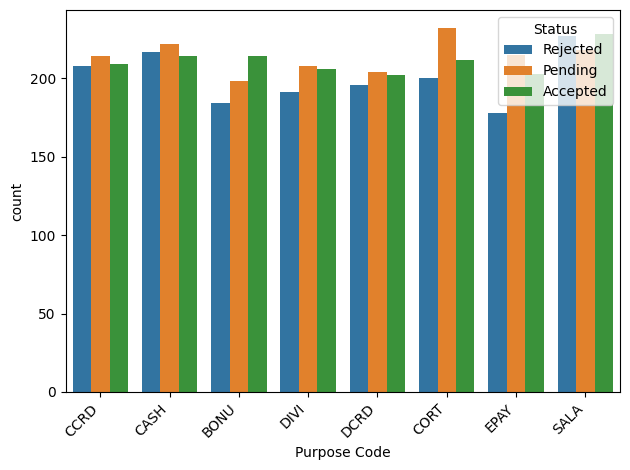

In [ ]:
sns.countplot(data=data, x='Purpose Code', hue='Status')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

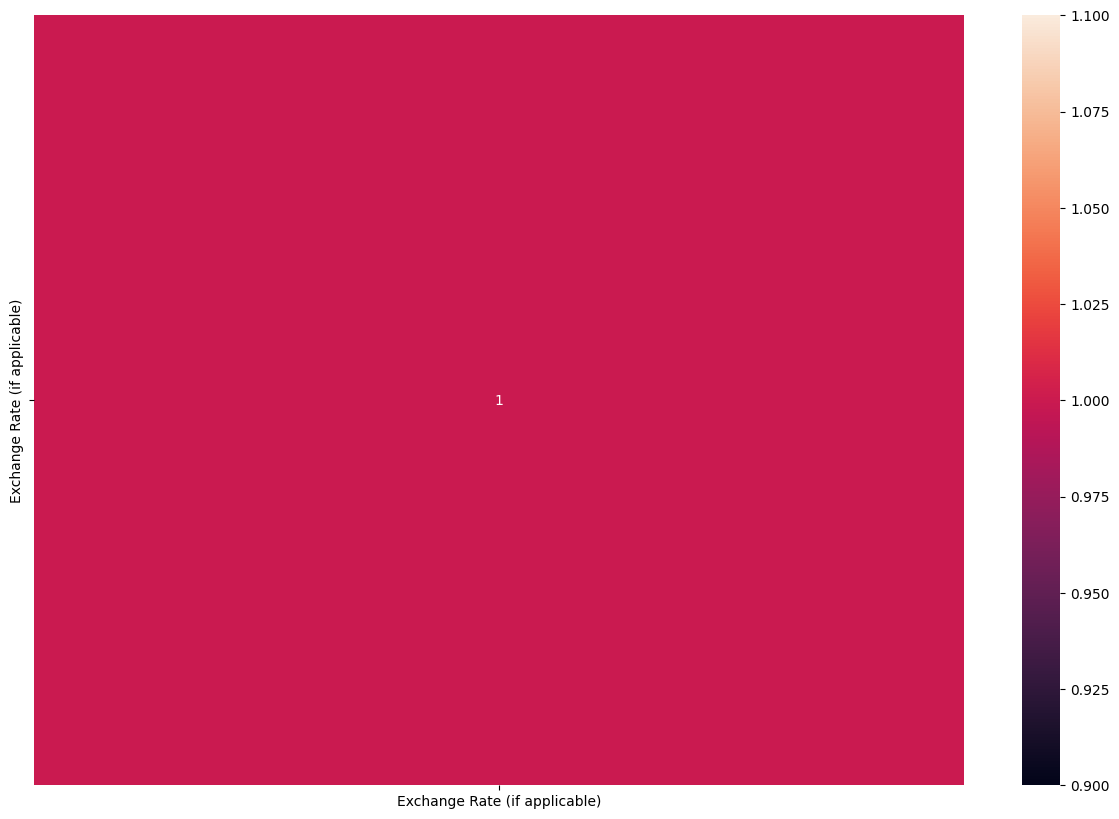

In [ ]:
#using Seaborn, finding out the correlation between the numerical values.
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
data.head()
data.columns

Index(['Message Type', 'Message ID', 'Execution Date', 'Intermediary Name',
       'Debtor Name', 'Debtor Account Number', 'Creditor Name',
       'Creditor Account Number', 'Charges Bearer', 'Remittance Information',
       'Status', 'Exchange Rate (if applicable)', 'Purpose Code',
       'Instruction for Creditor Agent', 'Creditor Address', 'Debtor Address',
       'Creditor BIC', 'Debtor BIC', 'Debtor County', 'Debtor State',
       'Creditor County', 'Creditor State', 'Payment_Currency',
       'Payment_Amount', 'Sender_Charge_Currency', 'Sender_Charge_Amount',
       'Intermediary_Charge_Currency', 'Intermediary_Charge_Amount'],
      dtype='object')

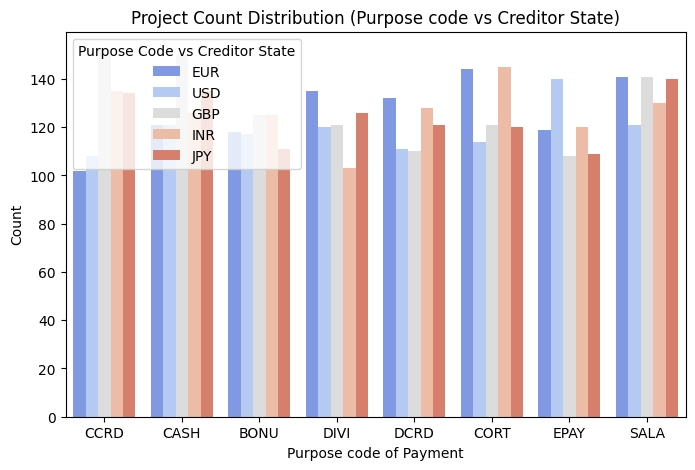

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Purpose Code", hue="Payment_Currency", data=data, palette="coolwarm")
plt.title("Project Count Distribution (Purpose code vs Creditor State)")
plt.xlabel("Purpose code of Payment")
plt.ylabel("Count")
plt.legend(title="Purpose Code vs Creditor State")
plt.show()

#pd.crosstab(df.sales, df.salary).plot(kind='bar')
#plt.show
#sns.barplot(x=df['salary'],y=df['satisfaction_level'])
#plt.show()

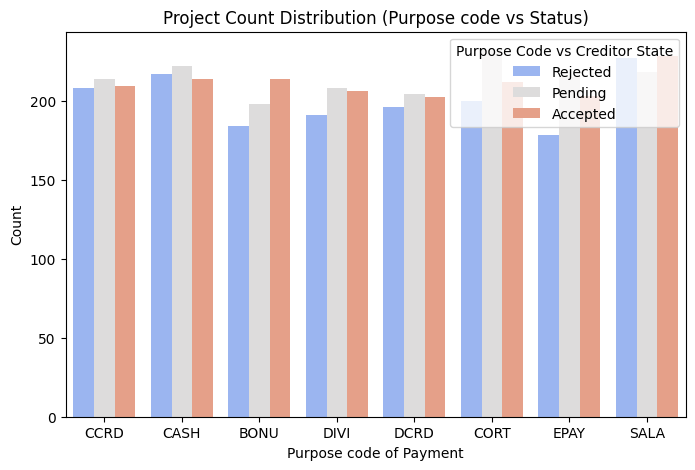

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Purpose Code", hue="Status", data=data, palette="coolwarm")
plt.title("Project Count Distribution (Purpose code vs Status)")
plt.xlabel("Purpose code of Payment")
plt.ylabel("Count")
plt.legend(title="Purpose Code vs Status")
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Purpose Code", hue="Status", data=data, palette="coolwarm")
plt.title("Project Count Distribution (Purpose code vs Status)")
plt.xlabel("Purpose code of Payment")
plt.ylabel("Count")
plt.legend(title="Purpose Code vs Status")
plt.show()

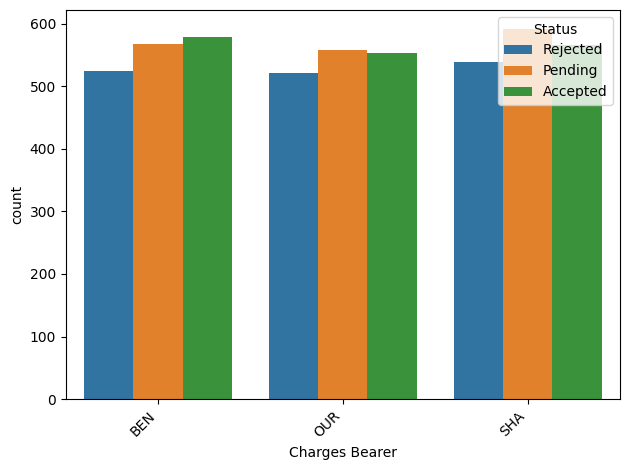

In [ ]:
sns.countplot(data=data, x='Charges Bearer', hue='Status')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

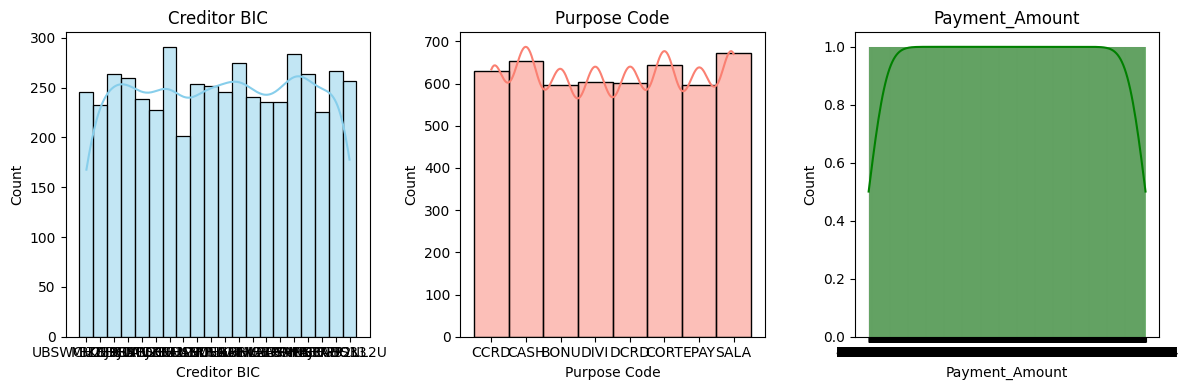

In [ ]:

#Draw Distribution plot
# 2.2.	Draw the distribution plot of:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data['Creditor BIC'],kde=True,color='skyblue')
plt.title('Creditor BIC')

plt.subplot(1,3,2)
sns.histplot(data['Purpose Code'],kde=True,color='salmon')
plt.title('Purpose Code')

plt.subplot(1,3,3)
sns.histplot(data['Payment_Amount'],kde=True,color='green')
plt.title('Payment_Amount')

plt.tight_layout()
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Message Type                    5000 non-null   object        
 1   Message ID                      5000 non-null   object        
 2   Execution Date                  5000 non-null   datetime64[ns]
 3   Intermediary Name               5000 non-null   object        
 4   Debtor Name                     5000 non-null   object        
 5   Debtor Account Number           5000 non-null   object        
 6   Creditor Name                   5000 non-null   object        
 7   Creditor Account Number         5000 non-null   object        
 8   Charges Bearer                  5000 non-null   object        
 9   Remittance Information          5000 non-null   object        
 10  Status                          5000 non-null   object        
 11  Exch

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Message Type                   5000 non-null   object        
 1   Message ID                     5000 non-null   object        
 2   Execution Date                 5000 non-null   datetime64[ns]
 3   Debtor Name                    5000 non-null   object        
 4   Debtor Account Number          5000 non-null   object        
 5   Creditor Name                  5000 non-null   object        
 6   Creditor Account Number        5000 non-null   object        
 7   Charges Bearer                 5000 non-null   object        
 8   Remittance Information         5000 non-null   object        
 9   Status                         5000 non-null   object        
 10  Exchange Rate (if applicable)  5000 non-null   float64       
 11  Purpose Code     

In [ ]:
data.groupby('Charges Bearer').value_counts()


Charges Bearer  Message Type  Message ID  Execution Date  Intermediary Name               Debtor Name      Debtor Account Number  Creditor Name      Creditor Account Number  Remittance Information  Status    Exchange Rate (if applicable)  Purpose Code  Instruction for Creditor Agent  Creditor Address             Debtor Address                  Creditor BIC  Debtor BIC   Debtor County      Debtor State  Creditor County     Creditor State  Payment_Currency  Payment_Amount  Sender_Charge_Currency  Sender_Charge_Amount  Intermediary_Charge_Currency  Intermediary_Charge_Amount
BEN             PACS.008      REF100000   2025-01-03      Ball Inc                        Victoria Lewis   PUPC81480687430802     Amy Daniels        BYZK78819053587504       CCRD                    Rejected  0.9547                         CCRD          TOKN                            60618 Timothy Island         9714 Hayes Throughway           UBSWCHZH80A   WFBIUS6S     Patriciafurt       GA            South Rebecca       FM              EUR               19368.73        EUR                     183.98                EUR                           20.42                         1
                              REF100005   2025-01-01      Carr, Sullivan and Jordan       Connie Castro    FCQM92857213353031     Alicia Dunlap      WHLZ41758001271125       CCRD                    Accepted  0.9044                         BONU          TELB                            31784 Jorge Island           55814 Mcguire Mall              BARCGB22      MIDLGB22     South Markmouth    NJ            East Benjaminmouth  SC              INR               58411.65        INR                     196.12                INR                           125.25                        1
                              REF100025   2025-01-12      Smith, Adams and Erickson       Alec Fields      GHBS96545382651717     Kayla Garcia       EPCH49870437984041       EPAY                    Rejected  0.7654                         CORT          CORT                            545 Cross Mills              271 Calvin Trace                DEUTDEFF      GEBABEBB     Ericahaven         VT            West Paul           RI              EUR               65779.61        EUR                     105.56                EUR                           40.9                          1
                              REF100033   2025-01-15      Brandt PLC                      Robert Buckley   RXFJ29991333002278     Kristopher Taylor  DCRA92658517648172       CCRD                    Pending   0.7177                         CASH          HOLD                            4624 Silva Walk              4636 Jones Crescent             CHASUS33      SCBLGB2L     South Bradley      VA            Garciachester       NV              EUR               14853.22        EUR                     314.55                EUR                           143.18                        1
                              REF100052   2025-01-12      Harrell Inc                     Sandra Hughes    AIMV04430248175433     Laurie Martinez    QMNP30212093970055       CORT                    Accepted  1.2707                         BONU          TOKN                            677 Lee Estates              1018 Murray Fords               BOFAUS3N      DRESDEFF     Dayborough         ID            Carolynmouth        RI              GBP               17455.43        GBP                     278.58                GBP                           12.93                         1
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
data.value_counts().groupby('Purpose Code').count()
data.value_counts().groupby('Instruction for Creditor Agent').count()
data.value_counts().groupby('Remittance Information').count()

,count
Remittance Information,
BONU,518
CASH,546
CCRD,474
CORT,474
DCRD,468
DIVI,518
EPAY,496
SALA,486


In [ ]:
data.groupby(['Creditor BIC','Creditor State']).Payment_Amount.max()
data.groupby(['Creditor BIC','Creditor State']).Payment_Amount.min()
data.groupby(['Creditor BIC','Creditor State']).Payment_Amount.count().sort_values(ascending=False)
data_plt=data.groupby(['Creditor BIC','Creditor State','Purpose Code']).Payment_Amount.max().sort_values(ascending=False)
data.groupby(['Creditor BIC','Creditor State']).Payment_Amount.count().sort_values(ascending=False)
data.groupby(['Creditor BIC','Debtor BIC']).Payment_Amount.count().sort_values(ascending=False)
#data_plt

import matplotlib.pyplot as plt

# Assuming data_plt is already calculated as in your provided code

# Convert data_plt to a DataFrame for easier plotting
#data_plt_df = data_plt.reset_index()

# Create the plot
#plt.figure(figsize=(12, 6))  # Adjust figure size as needed
#plt.bar(data_plt_df['Creditor BIC'] + ', ' + data_plt_df['Creditor State'] + ', ' + data_plt_df['Purpose Code'], data_plt_df['Payment_Amount'])
#plt.xlabel('Creditor BIC, Creditor State, Purpose Code')
#plt.ylabel('Maximum Payment Amount')
#plt.title('Maximum Payment Amount by Creditor, State, and Purpose')
#plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
#plt.tight_layout()
#plt.show()
#

#IF a particular combination of creditor, debtor, and charges bearer has an unusually high number of transactions, it might be worth investigating further.

In [ ]:
#IF a particular combination of creditor, debtor, and charges bearer has an unusually high number of transactions, it might be worth investigating further.

data.groupby(['Creditor BIC','Debtor BIC','Charges Bearer']).Payment_Amount.sum().sort_values(ascending=False)
data.groupby(['Creditor BIC','Debtor BIC','Charges Bearer']).Payment_Amount.count().sort_values(ascending=False)
data.groupby(['Creditor BIC','Debtor BIC','Charges Bearer']).Intermediary_Charge_Amount.sum().sort_values(ascending=False)

,,,Intermediary_Charge_Amount
Creditor BIC,Debtor BIC,Charges Bearer,
INGBNL2A,UBSWCHZH80A,BEN,99.67179.13198.62
CHASUS33,ZKBKCHZZ80A,BEN,99.62154.94105.02107.0212.52
NDEAFIHH,FTSBUS44,OUR,99.31100.0139.638.29154.04108.35
NATXFRPP,FTSBUS44,SHA,99.16189.8777.8871.147.49
UBSWCHZH80A,SCBLGB2L,SHA,98.94152.7197.3
...,...,...,...
RABONL2U,RBOSGB2L,SHA,0.7660.8156.39138.35191.13
BOFAUS3N,HLFXGB21,SHA,0.5627.1463.4822.4369.03
BNLIITRR,UBSWCHZH80A,OUR,0.49


Top 10 combination of Creditor and Debtor BIC and Status

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'WFBIUS6S'),
  Text(1, 0, 'DRESDEFF'),
  Text(2, 0, 'HLFXGB21'),
  Text(3, 0, 'MIDLGB22'),
  Text(4, 0, 'RBOSGB2L'),
  Text(5, 0, 'UBSWCHZH80A'),
  Text(6, 0, 'SCBLGB2L'),
  Text(7, 0, 'BKAUATWW'),
  Text(8, 0, 'ABNANL2A'),
  Text(9, 0, 'NWBKGB2L'),
  Text(10, 0, 'KREDBEBB'),
  Text(11, 0, 'DABADKKK'),
  Text(12, 0, 'FTSBUS44'),
  Text(13, 0, 'ZKBKCHZZ80A'),
  Text(14, 0, 'BSCHESMM'),
  Text(15, 0, 'GEBABEBB'),
  Text(16, 0, 'SGSSFRPP'),
  Text(17, 0, 'BKTRUS33'),
  Text(18, 0, 'LOYDGB2L'),
  Text(19, 0, 'SMBCJPJT')])

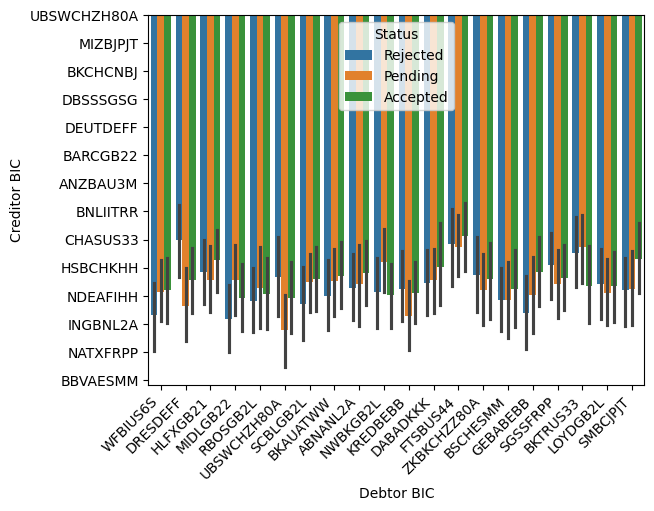

In [ ]:
sns.barplot(data=data, x='Debtor BIC', y='Creditor BIC', hue='Status')
plt.xticks(rotation=45, ha='right')

In [ ]:
data.value_counts().groupby('Purpose Code').count()

,count
Purpose Code,
BONU,454
CASH,503
CCRD,494
CORT,510
DCRD,487
DIVI,498
EPAY,489
SALA,545


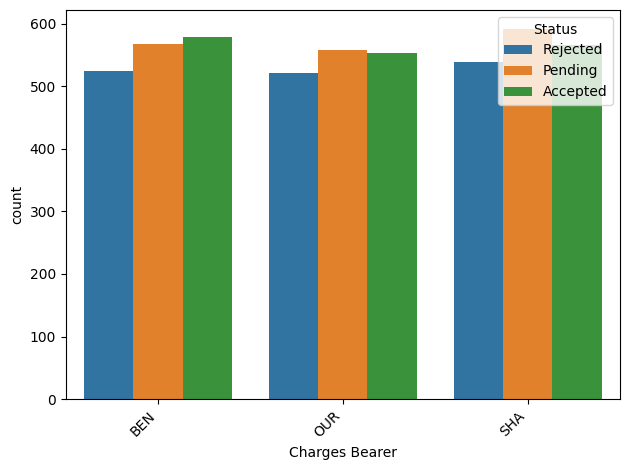

In [ ]:
sns.countplot(data=data, x='Charges Bearer', hue='Status')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

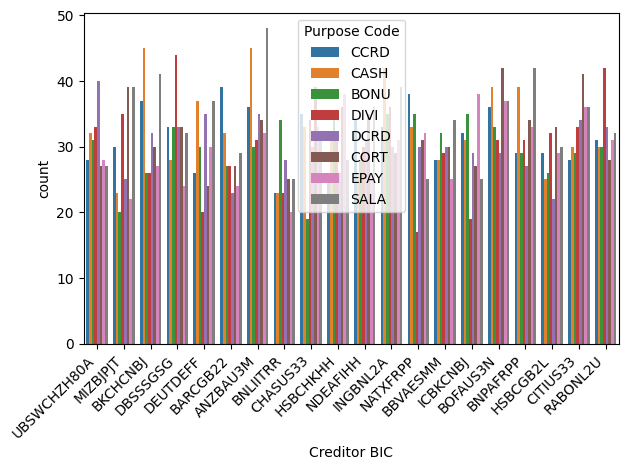

In [ ]:
sns.countplot(data=data, x='Creditor BIC', hue='Purpose Code')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
#sns.countplot(data=data, x='Creditor BIC', hue='Creditor State')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
#plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
#plt.tight_layout() # Adjust layout to prevent labels from overlapping
#plt.show()

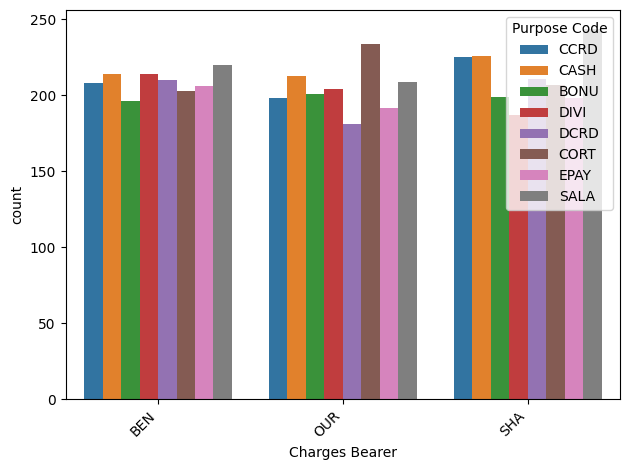

In [ ]:
sns.countplot(data=data, x='Charges Bearer', hue='Purpose Code')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
#Data shows Remittance Information with Payment Amount
data.groupby(['Remittance Information']).Payment_Amount.min()


#data.groupby(['Remittance Information']).Payment_Amount.min().sort_values(ascending=False)
#data.groupby(['Remittance Information']).Payment_Amount.sum().sort_values(ascending=True)

,Payment_Amount
Remittance Information,
BONU,10054.11
CASH,10194.7
CCRD,1011.61
CORT,10024.04
DCRD,11105.89
DIVI,10075.94
EPAY,10039.41
SALA,10238.55


<Axes: xlabel='Remittance Information,Charges Bearer'>

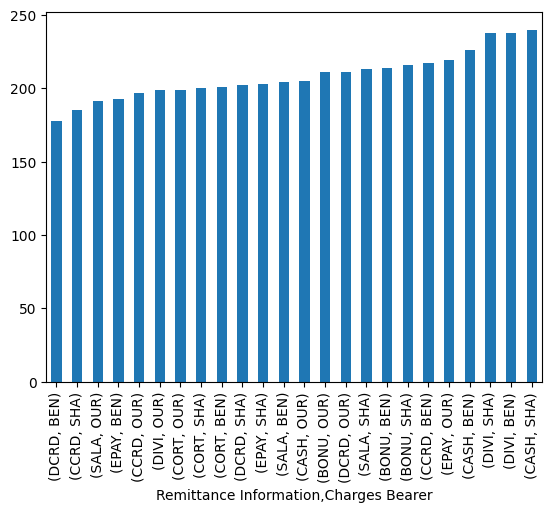

In [ ]:
#data.groupby(['Remittance Information']).Payment_Amount.min().sort_values(ascending=False)

data.groupby(['Remittance Information','Charges Bearer']).Payment_Currency.count().sort_values(ascending=True)
data.groupby(['Remittance Information','Charges Bearer']).Payment_Currency.count().sort_values(ascending=True).plot(kind='bar')

In [ ]:

data.groupby(['Execution Date','Charges Bearer']).Payment_Currency.count().sort_values(ascending=True)

,,Payment_Currency
Execution Date,Charges Bearer,
2025-01-14,BEN,42
2025-01-24,OUR,42
2025-01-01,OUR,45
2025-01-04,SHA,46
2025-01-20,OUR,48
...,...,...
2025-01-18,SHA,71
2025-01-09,OUR,71
2025-01-13,BEN,72


Remittance Information for the Different Purpose code and activities around it

In [ ]:

data.groupby(['Remittance Information','Execution Date']).Payment_Currency.count().sort_values(ascending=True)


Remittance Information  Execution Date
CCRD                    2025-01-26        10
DCRD                    2025-01-12        12
                        2025-01-09        14
                        2025-01-11        14
EPAY                    2025-01-08        14
                                          ..
CASH                    2025-01-13        34
DIVI                    2025-01-02        35
CASH                    2025-01-21        35
DIVI                    2025-01-18        36
                        2025-01-27        38
Name: Payment_Currency, Length: 224, dtype: int64

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


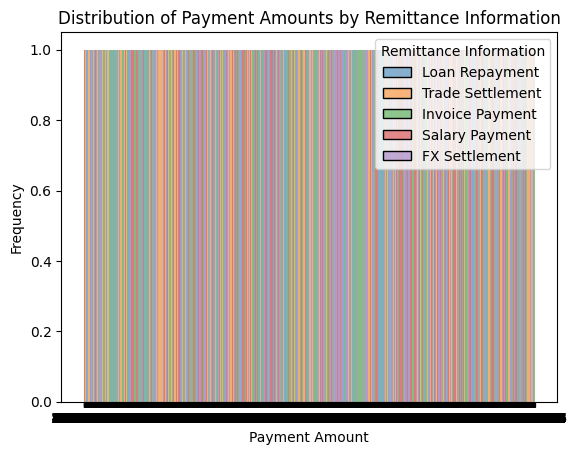

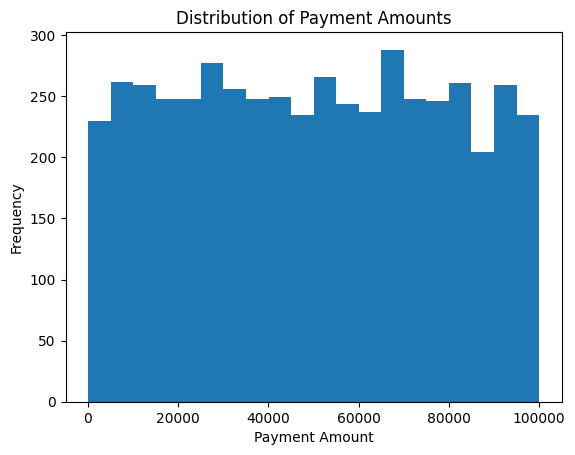

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Payment_Amount' to numeric
data['Payment_Amount'] = pd.to_numeric(data['Payment_Amount'])

# Create a histogram
plt.hist(data['Payment_Amount'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Payment Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Payment Amounts')
plt.show()

In [ ]:
data.head(1)

,Message Type,Message ID,Execution Date,Intermediary Name,Debtor Name,Debtor Account Number,Creditor Name,Creditor Account Number,Charges Bearer,Remittance Information,...,Debtor County,Debtor State,Creditor County,Creditor State,Payment_Currency,Payment_Amount,Sender_Charge_Currency,Sender_Charge_Amount,Intermediary_Charge_Currency,Intermediary_Charge_Amount
0,PACS.008,REF100000,2025-01-03,Ball Inc,Victoria Lewis,PUPC81480687430802,Amy Daniels,BYZK78819053587504,BEN,CCRD,...,Patriciafurt,GA,South Rebecca,FM,EUR,19368.73,EUR,183.98,EUR,20.42


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Message Type                    5000 non-null   object        
 1   Message ID                      5000 non-null   object        
 2   Execution Date                  5000 non-null   datetime64[ns]
 3   Intermediary Name               5000 non-null   object        
 4   Debtor Name                     5000 non-null   object        
 5   Debtor Account Number           5000 non-null   object        
 6   Creditor Name                   5000 non-null   object        
 7   Creditor Account Number         5000 non-null   object        
 8   Charges Bearer                  5000 non-null   object        
 9   Remittance Information          5000 non-null   object        
 10  Status                          5000 non-null   object        
 11  Exch

# Top 20 payment amount for the Creditor BIC based on the dates and Payment Amount

In [ ]:
top20 = data.groupby(['Creditor BIC'])['Payment_Amount'].max().sort_values(ascending=True).head(20).reset_index()
top20

,Creditor BIC,Payment_Amount
0,BARCGB22,98373.31
1,DBSSSGSG,99418.42
2,ICBKCNBJ,9945.97
3,BNPAFRPP,9953.15
4,CHASUS33,99587.52
5,BKCHCNBJ,99615.3
6,CITIUS33,99643.77
7,ANZBAU3M,99692.11
8,HSBCHKHH,99693.22
9,BNLIITRR,99712.09


In [ ]:
#Draw Distribution plot
# 2.2.	Draw the distribution plot of:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df['satisfaction_level'],kde=True,color='skyblue')
plt.title('Employee satisfaction dist')

plt.subplot(1,3,2)
sns.histplot(df['last_evaluation'],kde=True,color='salmon')
plt.title('Employee last_evaluation')

plt.subplot(1,3,3)
sns.histplot(df['average_montly_hours'],kde=True,color='green')
plt.title('Employee average_montly_hours')

plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x="number_project", hue="left", data=df, palette="coolwarm")
plt.title("Project Count Distribution (Left vs Stayed)")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.show()

In [ ]:
#using Seaborn, finding out the correlation between the numerical values.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

Top 20 payment amount for the Creditor BIC based on the dates and Payment Amount

In [ ]:
top20 = data.groupby(['Execution Date'])['Payment_Amount'].sum().sort_values(ascending=True).head(20).reset_index()
top20

,Execution Date,Payment_Amount
0,2025-01-12,11190.0765779.6117455.4354633.0355648.549214.7...
1,2025-01-17,11936.2158804.8172434.8135613.086755.1315477.8...
2,2025-01-15,14853.2265474.9754889.6539709.5346064.9914736....
3,2025-01-03,19368.7383954.412425.4636255.7468732.6660199.0...
4,2025-01-07,30228.0755881.7653223.0912277.2412336.1994896....
5,2025-01-16,30698.5225886.9892447.6662760.2582810.682342.5...
6,2025-01-25,34418.8563461.1633171.994839.4510065.647240.23...
7,2025-01-21,34550.8570519.8923287.0180790.828209.4893762.8...
8,2025-01-28,3597.8810358.9874150.5640112.3647778.4734893.2...
9,2025-01-27,47985.161742.2654518.8132065.8188266.2547812.1...


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Execution Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Execution Date'}, axis=1)
              .sort_values('Execution Date', ascending=True))
  xs = counted['Execution Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = top20.sort_values('Execution Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Execution Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Execution Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Execution Date'}, axis=1)
              .sort_values('Execution Date', ascending=True))
  xs = counted['Execution Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = top20.sort_values('Execution Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Execution Date')
_ = plt.ylabel('count()')

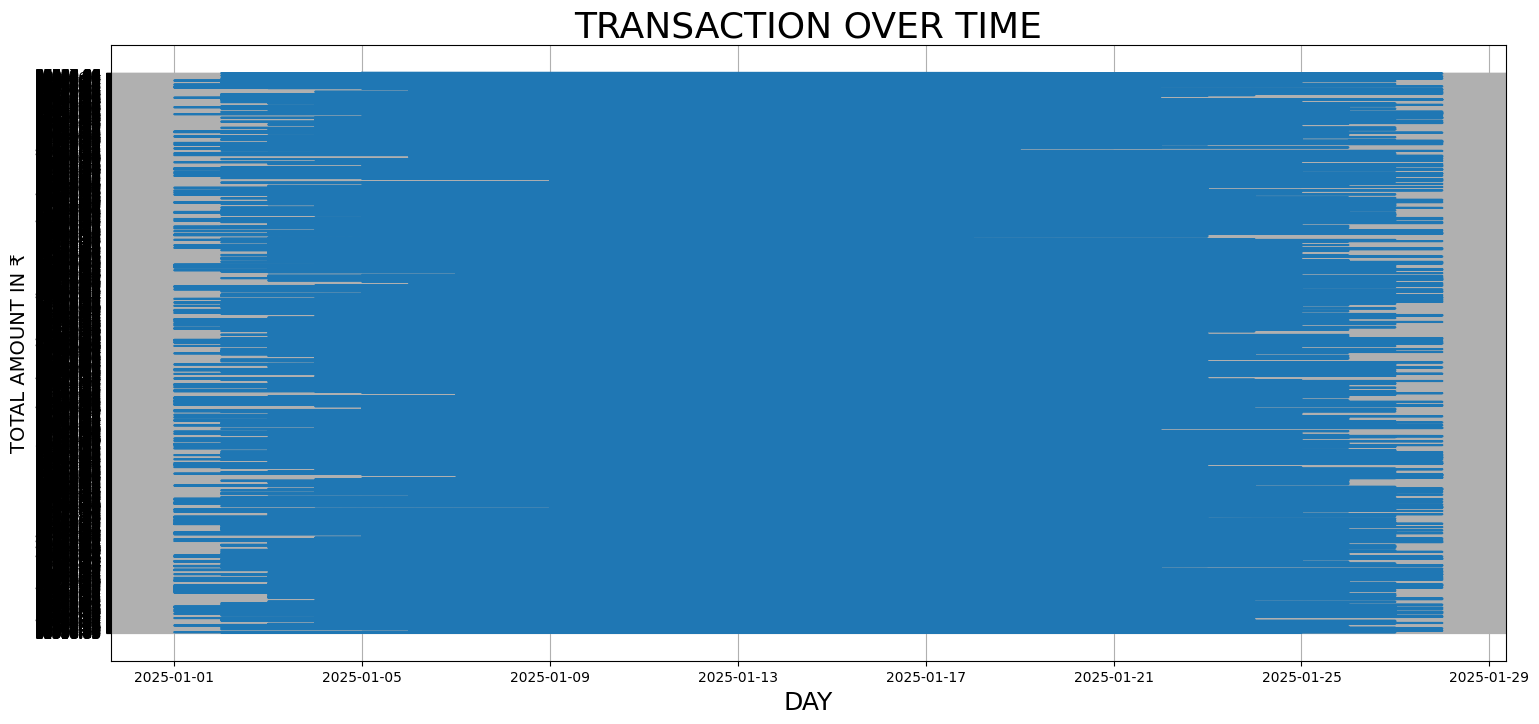

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(data['Execution Date'],data['Payment_Amount'])
plt.xlabel("DAY",fontsize=18)
plt.ylabel('TOTAL AMOUNT IN ₹',fontsize=14)
plt.title("TRANSACTION OVER TIME",fontsize=26)
plt.grid(True)
plt.show()

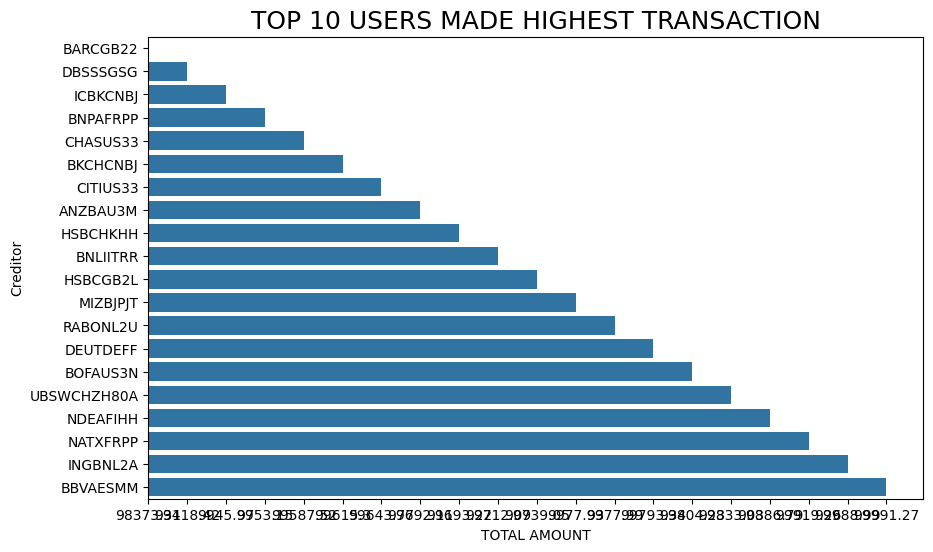

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot( x='Payment_Amount',y='Creditor BIC', data=top20,orient='h')
plt.title('TOP 10 USERS MADE HIGHEST TRANSACTION',fontsize=18)
plt.xlabel('TOTAL AMOUNT')
plt.ylabel('Creditor')
plt.show()

Top 10 Customer and their transaction behaviour

In [ ]:
data.head(10)


,Message Type,Message ID,Execution Date,Intermediary Name,Debtor Name,Debtor Account Number,Creditor Name,Creditor Account Number,Charges Bearer,Remittance Information,...,Debtor County,Debtor State,Creditor County,Creditor State,Payment_Currency,Payment_Amount,Sender_Charge_Currency,Sender_Charge_Amount,Intermediary_Charge_Currency,Intermediary_Charge_Amount
0,PACS.008,REF100000,2025-01-03,Ball Inc,Victoria Lewis,PUPC81480687430802,Amy Daniels,BYZK78819053587504,BEN,CCRD,...,Patriciafurt,GA,South Rebecca,FM,EUR,19368.73,EUR,183.98,EUR,20.42
1,PACS.008,REF100001,2025-01-14,Hardy-Jones,Jorge Green,EMSZ86980142512720,Katherine Taylor,KIXK34220804425082,OUR,DIVI,...,West Edward,WA,South David,GA,USD,62508.36,USD,381.04,USD,134.56
2,PACS.009,REF100002,2025-01-25,Williamson Group,Kimberly Rivera,YJPG49156434557820,Anthony Gardner,PTVZ62668729808443,BEN,SALA,...,West Steve,NY,Deantown,IL,USD,34418.85,USD,46.14,USD,72.85
3,PACS.009,REF100003,2025-01-02,Willis-Carey,Abigail Johnson,OJYL33392255840699,Christy Reese,TMAG38660992274225,SHA,CORT,...,Josephfurt,SD,Waynemouth,PR,GBP,9898.03,GBP,67.23,GBP,197.92
4,PACS.009,REF100004,2025-01-27,Silva LLC,Patricia Henry,FSWL06568032089283,Jennifer Martinez,SRTF89329335706297,OUR,DCRD,...,New Danielle,TN,Donnaborough,ND,INR,47985.16,INR,90.47,INR,139.25
5,PACS.008,REF100005,2025-01-01,"Carr, Sullivan and Jordan",Connie Castro,FCQM92857213353031,Alicia Dunlap,WHLZ41758001271125,BEN,CCRD,...,South Markmouth,NJ,East Benjaminmouth,SC,INR,58411.65,INR,196.12,INR,125.25
6,PACS.009,REF100006,2025-01-11,Pittman Inc,Matthew Martinez,JJIY14697014390715,Brian Smith,ZIXC81896985818068,BEN,BONU,...,Wendyhaven,WA,Weissland,NH,USD,95590.95,USD,280.71,USD,110.71
7,PACS.008,REF100007,2025-01-05,Jensen and Sons,David Williams,TLPP48778774285736,Brandon Vega,LAKL74375424607735,BEN,EPAY,...,South Danielleburgh,GU,APO AE 16331,None,USD,62862.47,USD,441.85,USD,194.43
8,PACS.009,REF100008,2025-01-21,Vasquez PLC,Jenna Mueller,TTEE93818350906218,Christine Brown,KZHP43669469028552,BEN,CCRD,...,New Joseph,KS,Jasonfurt,NJ,JPY,34550.85,JPY,425.81,JPY,179.55
9,PACS.009,REF100009,2025-01-17,Rogers-Francis,Glenn Green,LPNG70530201161868,Sharon Sutton,VUAO65977156181618,SHA,DCRD,...,Ortizburgh,IN,APO AP 91822,None,EUR,11936.21,EUR,311.74,EUR,96.0


In [ ]:
data.columns

Index(['Message Type', 'Message ID', 'Execution Date', 'Intermediary Name',
       'Debtor Name', 'Debtor Account Number', 'Creditor Name',
       'Creditor Account Number', 'Charges Bearer', 'Remittance Information',
       'Status', 'Exchange Rate (if applicable)', 'Purpose Code',
       'Instruction for Creditor Agent', 'Creditor Address', 'Debtor Address',
       'Creditor BIC', 'Debtor BIC', 'Debtor County', 'Debtor State',
       'Creditor County', 'Creditor State', 'Payment_Currency',
       'Payment_Amount', 'Sender_Charge_Currency', 'Sender_Charge_Amount',
       'Intermediary_Charge_Currency', 'Intermediary_Charge_Amount'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = ['Message Type', 'Charges Bearer', 'Remittance Information','Intermediary_Charge_Currency','Creditor County','Purpose Code','Status','Debtor County','Creditor BIC','Debtor BIC','Creditor State','Payment_Currency','Sender_Charge_Currency','Debtor State', 'Purpose Code','Instruction for Creditor Agent']

# Create a LabelEncoder instance
le = LabelEncoder()

# Create a dictionary to store mappings for each column
mappings = {}

# Loop through the columns and apply Label Encoding
for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])  # Encode the column
    mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))  # Store the mapping

# Print the mappings for each column
for column, mapping in mappings.items():
    print(f"Mapping for {column}:")
    print(mapping)
    print("\n")

Mapping for Message Type:
{'PACS.008': 0, 'PACS.009': 1}


Mapping for Charges Bearer:
{'BEN': 0, 'OUR': 1, 'SHA': 2}


Mapping for Remittance Information:
{'BONU': 0, 'CASH': 1, 'CCRD': 2, 'CORT': 3, 'DCRD': 4, 'DIVI': 5, 'EPAY': 6, 'SALA': 7}


Mapping for Intermediary_Charge_Currency:
{'EUR': 0, 'GBP': 1, 'INR': 2, 'JPY': 3, 'USD': 4}


Mapping for Creditor County:
{'APO AA 03250': 0, 'APO AA 07021': 1, 'APO AA 08658': 2, 'APO AA 09214': 3, 'APO AA 12249': 4, 'APO AA 12321': 5, 'APO AA 14406': 6, 'APO AA 15296': 7, 'APO AA 16866': 8, 'APO AA 17905': 9, 'APO AA 17978': 10, 'APO AA 19305': 11, 'APO AA 20169': 12, 'APO AA 20843': 13, 'APO AA 22852': 14, 'APO AA 24281': 15, 'APO AA 24986': 16, 'APO AA 25937': 17, 'APO AA 29912': 18, 'APO AA 30376': 19, 'APO AA 32538': 20, 'APO AA 33990': 21, 'APO AA 34126': 22, 'APO AA 37385': 23, 'APO AA 37969': 24, 'APO AA 38139': 25, 'APO AA 42275': 26, 'APO AA 43848': 27, 'APO AA 44265': 28, 'APO AA 45851': 29, 'APO AA 46014': 30, 'APO AA 50939': 31

Feature Engineering and droping the data not required for the ML Modeling

In [ ]:
#Execution Date - to be consider for the feature engineering
columns_to_drops=['Message ID','Intermediary Name','Debtor Name','Debtor Account Number','Creditor Name','Creditor Account Number','Creditor Address','Debtor Address','Execution Date']

for column in columns_to_drops:
  if column in data.columns:
    data.drop([column],axis=1,inplace=True)




In [ ]:
data.columns

Index(['Message Type', 'Execution Date', 'Charges Bearer',
       'Remittance Information', 'Status', 'Exchange Rate (if applicable)',
       'Purpose Code', 'Instruction for Creditor Agent', 'Creditor BIC',
       'Debtor BIC', 'Debtor County', 'Debtor State', 'Creditor County',
       'Creditor State', 'Payment_Currency', 'Payment_Amount',
       'Sender_Charge_Currency', 'Sender_Charge_Amount',
       'Intermediary_Charge_Currency', 'Intermediary_Charge_Amount'],
      dtype='object')

In [ ]:
data.head()

,Message Type,Charges Bearer,Remittance Information,Status,Exchange Rate (if applicable),Purpose Code,Instruction for Creditor Agent,Creditor BIC,Debtor BIC,Debtor County,Debtor State,Creditor County,Creditor State,Payment_Currency,Payment_Amount,Sender_Charge_Currency,Sender_Charge_Amount,Intermediary_Charge_Currency,Intermediary_Charge_Amount
0,0,0,2,2,0.9547,2,13,19,18,3033,12,3812,11,0,19368.73,0,183.98,0,20.42
1,0,1,5,2,0.5580,2,9,15,5,4137,55,3668,12,4,62508.36,4,381.04,4,134.56
2,1,0,7,1,0.9752,2,14,3,8,4319,39,817,17,4,34418.85,4,46.14,4,72.85
3,1,2,3,2,1.1252,1,5,9,8,1785,48,4064,44,1,9898.03,1,67.23,1,197.92
4,1,1,4,1,1.1432,2,13,10,11,2502,49,852,33,2,47985.16,2,90.47,2,139.25


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Message Type                    5000 non-null   int64         
 1   Message ID                      5000 non-null   object        
 2   Execution Date                  5000 non-null   datetime64[ns]
 3   Intermediary Name               5000 non-null   object        
 4   Debtor Name                     5000 non-null   object        
 5   Debtor Account Number           5000 non-null   object        
 6   Creditor Name                   5000 non-null   object        
 7   Creditor Account Number         5000 non-null   object        
 8   Charges Bearer                  5000 non-null   int64         
 9   Remittance Information          5000 non-null   int64         
 10  Status                          5000 non-null   int64         
 11  Exch

In [ ]:
data['Intermediary_Charge_Currency']=le.fit_transform(data['Intermediary_Charge_Currency'])
le.inverse_transform([0,1])
Debtor_state=le.classes_

In [ ]:
data['Instruction for Creditor Agent']=le.fit_transform(data['Instruction for Creditor Agent'])
le.inverse_transform([0,1])
Instruction_for_Creditor_Agent=le.classes_

In [ ]:
Creditor_state

array([' AK', ' AL', ' AR', ' AS', ' AZ', ' CA', ' CO', ' CT', ' DC',
       ' DE', ' FL', ' FM', ' GA', ' GU', ' HI', ' IA', ' ID', ' IL',
       ' IN', ' KS', ' KY', ' LA', ' MA', ' MD', ' ME', ' MH', ' MI',
       ' MN', ' MO', ' MP', ' MS', ' MT', ' NC', ' ND', ' NE', ' NH',
       ' NJ', ' NM', ' NV', ' NY', ' OH', ' OK', ' OR', ' PA', ' PR',
       ' PW', ' RI', ' SC', ' SD', ' TN', ' TX', ' UT', ' VA', ' VI',
       ' VT', ' WA', ' WI', ' WV', ' WY', None], dtype=object)

In [ ]:
Charges_Bearer

array(['BEN', 'OUR', 'SHA'], dtype=object)

In [ ]:
Debtor_state

array([' AK', ' AL', ' AR', ' AS', ' AZ', ' CA', ' CO', ' CT', ' DC',
       ' DE', ' FL', ' FM', ' GA', ' GU', ' HI', ' IA', ' ID', ' IL',
       ' IN', ' KS', ' KY', ' LA', ' MA', ' MD', ' ME', ' MH', ' MI',
       ' MN', ' MO', ' MP', ' MS', ' MT', ' NC', ' ND', ' NE', ' NH',
       ' NJ', ' NM', ' NV', ' NY', ' OH', ' OK', ' OR', ' PA', ' PR',
       ' PW', ' RI', ' SC', ' SD', ' TN', ' TX', ' UT', ' VA', ' VI',
       ' VT', ' WA', ' WI', ' WV', ' WY', None], dtype=object)

In [ ]:
# Get the details for the label-encoded 'Creditor State' field
creditor_state_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Creditor State Mapping:")
print(creditor_state_mapping)

# If you want to get the parameters of the LabelEncoder, simply use:
encoder_params = le.get_params()
print("\nLabelEncoder Parameters:")
print(encoder_params)

Creditor State Mapping:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59}

LabelEncoder Parameters:
{}


In [ ]:
data

,Message Type,Execution Date,Charges Bearer,Remittance Information,Status,Exchange Rate (if applicable),Purpose Code,Instruction for Creditor Agent,Creditor BIC,Debtor BIC,Debtor County,Debtor State,Creditor County,Creditor State,Payment_Currency,Payment_Amount,Sender_Charge_Currency,Sender_Charge_Amount,Intermediary_Charge_Currency,Intermediary_Charge_Amount
0,0,2025-01-03,0,2,2,0.9547,2,13,19,18,3033,12,3812,11,0,19368.73,0,183.98,0,20.42
1,0,2025-01-14,1,5,2,0.5580,2,9,15,5,4137,55,3668,12,4,62508.36,4,381.04,4,134.56
2,1,2025-01-25,0,7,1,0.9752,2,14,3,8,4319,39,817,17,4,34418.85,4,46.14,4,72.85
3,1,2025-01-02,2,3,2,1.1252,1,5,9,8,1785,48,4064,44,1,9898.03,1,67.23,1,197.92
4,1,2025-01-27,1,4,1,1.1432,2,13,10,11,2502,49,852,33,2,47985.16,2,90.47,2,139.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,2025-01-02,2,6,0,0.9425,7,9,8,17,3803,56,3609,2,4,67061.36,4,423.37,4,190.8
4996,1,2025-01-20,0,3,1,0.8959,3,5,3,10,3861,7,2199,44,4,80618.04,4,283.39,4,117.02
4997,1,2025-01-19,2,5,0,0.8817,0,8,0,7,3510,35,2063,15,0,21939.57,0,489.09,0,107.41
4998,1,2025-01-09,0,2,1,0.7732,5,11,18,12,3568,4,1492,9,0,29657.09,0,311.42,0,68.77


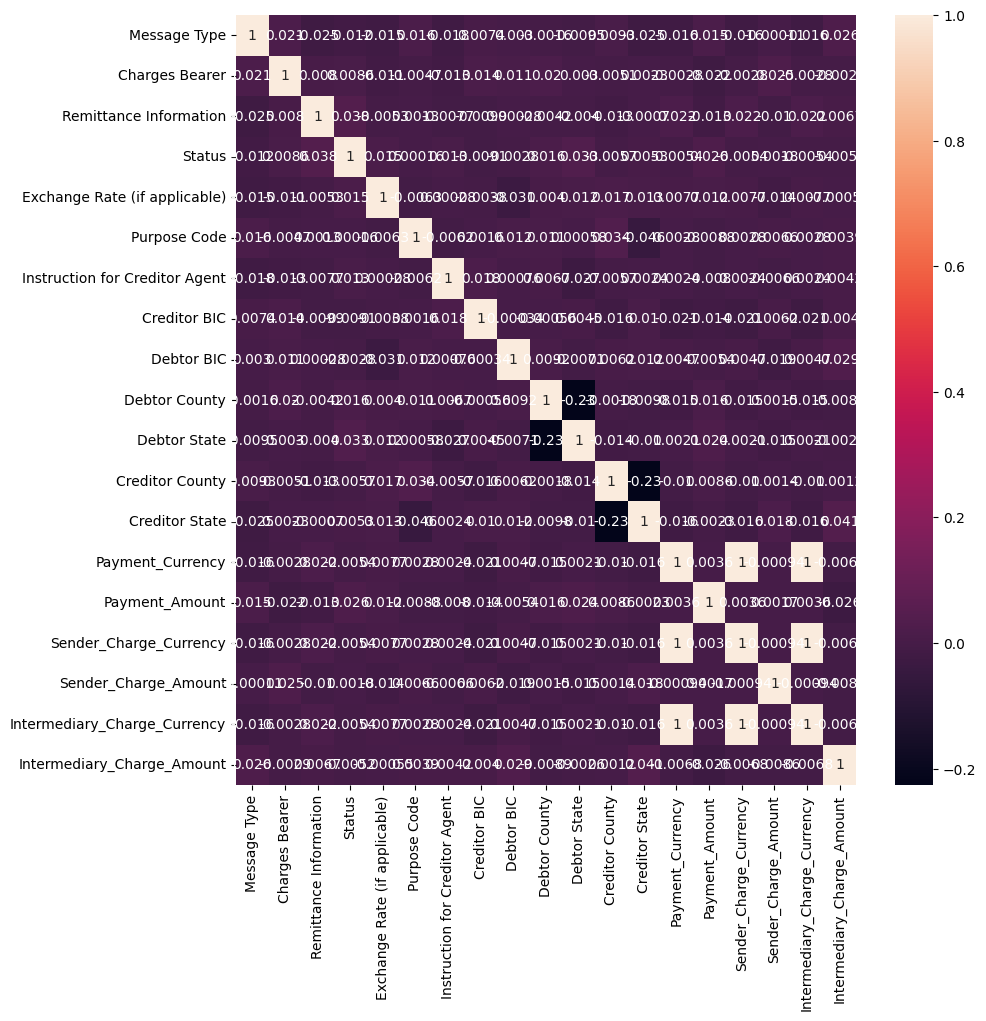

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
data

,Message Type,Charges Bearer,Remittance Information,Status,Exchange Rate (if applicable),Purpose Code,Instruction for Creditor Agent,Creditor BIC,Debtor BIC,Debtor County,Debtor State,Creditor County,Creditor State,Payment_Currency,Payment_Amount,Sender_Charge_Currency,Sender_Charge_Amount,Intermediary_Charge_Currency,Intermediary_Charge_Amount
0,0,0,2,2,0.9547,2,13,19,18,3033,12,3812,11,0,19368.73,0,183.98,0,20.42
1,0,1,5,2,0.5580,2,9,15,5,4137,55,3668,12,4,62508.36,4,381.04,4,134.56
2,1,0,7,1,0.9752,2,14,3,8,4319,39,817,17,4,34418.85,4,46.14,4,72.85
3,1,2,3,2,1.1252,1,5,9,8,1785,48,4064,44,1,9898.03,1,67.23,1,197.92
4,1,1,4,1,1.1432,2,13,10,11,2502,49,852,33,2,47985.16,2,90.47,2,139.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,2,6,0,0.9425,7,9,8,17,3803,56,3609,2,4,67061.36,4,423.37,4,190.8
4996,1,0,3,1,0.8959,3,5,3,10,3861,7,2199,44,4,80618.04,4,283.39,4,117.02
4997,1,2,5,0,0.8817,0,8,0,7,3510,35,2063,15,0,21939.57,0,489.09,0,107.41
4998,1,0,2,1,0.7732,5,11,18,12,3568,4,1492,9,0,29657.09,0,311.42,0,68.77


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Example model, you can choose others
from sklearn.metrics import accuracy_score # Example metric, you can choose others

# Assuming your data is in a pandas DataFrame called 'data'

# Convert Payment_Amount, Sender_Charge_Amount and Intermediary_Charge_Amount to numeric, handling errors
for col in ["Debtor State","Creditor State","Payment_Amount","Payment_Currency"]:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    # Fill missing values with the mean of each column.
    data[col].fillna(data[col].mean(), inplace=True)

# Define features (X) and target (y)
X = data.drop('Status', axis=1)
y = data['Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a model (RandomForestClassifier as an example)
model = RandomForestClassifier(random_state=42) # You can adjust hyperparameters
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_train= model.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Test Accuracy: {accuracy}")
print(f"Train Accuracy: {accuracy}")

from sklearn.metrics import classification_report,accuracy_score
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#print("\nClassification Report:\n", classification_report(y_test, y_pred_train))



<ipython-input-98-26f0b98d4648>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


Test Accuracy: 0.328
Train Accuracy: 0.328

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.29      0.31       357
           1       0.32      0.44      0.37       317
           2       0.33      0.26      0.29       326

    accuracy                           0.33      1000
   macro avg       0.33      0.33      0.32      1000
weighted avg       0.33      0.33      0.32      1000



In [ ]:
# Perform hyper parameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10,20],
    'max_depth': [1,2,3,5],
    'max_features': ['auto','sqrt'],
    'min_samples_split': [2,4],
    'min_samples_leaf': [1,2],
    'bootstrap': [True,False]

}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1,n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters: ', grid_search.best_params_)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Calculate and print accuracy
print('Accuracy score (test): ', accuracy_score(y_test, y_pred_test))
print('Accuracy score (train): ', accuracy_score(y_train, y_pred_train))

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters:  {'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}
Accuracy score (test):  0.336
Accuracy score (train):  0.4515


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
320 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

In [ ]:
data.columns

Index(['Message Type', 'Charges Bearer', 'Remittance Information', 'Status',
       'Exchange Rate (if applicable)', 'Purpose Code',
       'Instruction for Creditor Agent', 'Creditor BIC', 'Debtor BIC',
       'Debtor County', 'Debtor State', 'Creditor County', 'Creditor State',
       'Payment_Currency', 'Payment_Amount', 'Sender_Charge_Currency',
       'Sender_Charge_Amount', 'Intermediary_Charge_Currency',
       'Intermediary_Charge_Amount'],
      dtype='object')

 Explore other ML models for the accurancy and precision for the ML models

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Example model, you can choose others
from sklearn.metrics import accuracy_score # Example metric, you can choose others

# Convert Payment_Amount, Sender_Charge_Amount and Intermediary_Charge_Amount to numeric, handling errors
#for col in ["Purpose Code","Creditor State","Payment_Amount"]:
   # data[col] = pd.to_numeric(data[col], errors='coerce')
    # Fill missing values with the mean of each column.
   # data[col].fillna(data[col].mean(), inplace=True)

# Define features (X) and target (y)
X = data.drop('Status', axis=1)
y = data['Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializ90e and train a model (RandomForestClassifier as an example)
model = SVC() # You can adjust hyperparameters
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_train= model.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Test Accuracy: {accuracy}")
print(f"Train Accuracy: {accuracy}")

from sklearn.metrics import classification_report,accuracy_score
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#print("\nClassification Report:\n", classification_report(y_test, y_pred_train))



Test Accuracy: 0.338
Train Accuracy: 0.338

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.34      0.36       357
           1       0.32      0.68      0.43       317
           2       0.00      0.00      0.00       326

    accuracy                           0.34      1000
   macro avg       0.23      0.34      0.26      1000
weighted avg       0.24      0.34      0.27      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
est=DecisionTreeClassifier(max_depth=3) #Change the max _lenght to handel the overfitting
bc=BaggingClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn. import SVC # Example model, you can choose others
from sklearn.metrics import accuracy_score # Example metric, you can choose others

# Convert Payment_Amount, Sender_Charge_Amount and Intermediary_Charge_Amount to numeric, handling errors
#for col in ["Purpose Code","Creditor State","Payment_Amount"]:
   # data[col] = pd.to_numeric(data[col], errors='coerce')
    # Fill missing values with the mean of each column.
   # data[col].fillna(data[col].mean(), inplace=True)

# Define features (X) and target (y)
X = data.drop('Status', axis=1)
y = data['Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_cls=BaggingClassifier(estimator=est,n_estimators=100,random_state=42,oob_score=True)
bagging_cls.fit(X_train,y_train)
print('Training completed')





# Make predictions on the test set
y_pred = bagging_cls.predict(X_test)
y_pred_train= bagging_cls.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Test Accuracy: {accuracy}")
print(f"Train Accuracy: {accuracy}")

from sklearn.metrics import classification_report,accuracy_score
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#print("\nClassification Report:\n", classification_report(y_test, y_pred_train))

Training completed
Test Accuracy: 0.311
Train Accuracy: 0.311

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.14      0.19       357
           1       0.31      0.80      0.45       317
           2       0.22      0.02      0.04       326

    accuracy                           0.31      1000
   macro avg       0.28      0.32      0.23      1000
weighted avg       0.29      0.31      0.22      1000



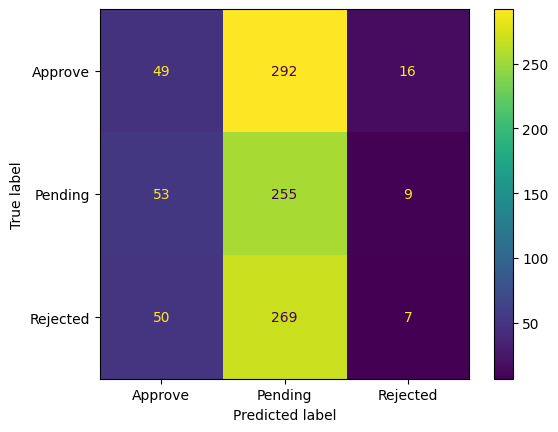

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Approve','Pending','Rejected'])
cm_display.plot()
plt.show()

In [ ]:
import joblib
#import pickel
pickel.dump(model,open('model.pkl','wb'))
joblib.dump(model, 'model.pkl')

ModuleNotFoundError: No module named 'pickel'

In [ ]:
import joblib
model=joblib.load('/content/model.joblib')
print('model loaded succesffully')

model loaded succesffully


In [ ]:
Data_Predict=X.head(1)
status=model.predict(Data_Predict)
print('Status of {} the payment is {}'.format(Data_Predict,status))

Status of    Message Type  Charges Bearer  Remittance Information  \
0             0               0                       2   

   Exchange Rate (if applicable)  Purpose Code  \
0                         0.9547             2   

   Instruction for Creditor Agent  Creditor BIC  Debtor BIC  Debtor County  \
0                              13            19          18           3033   

   Debtor State  Creditor County  Creditor State  Payment_Currency  \
0            12             3812              11                 0   

   Payment_Amount  Sender_Charge_Currency  Sender_Charge_Amount  \
0        19368.73                       0                183.98   

   Intermediary_Charge_Currency  Intermediary_Charge_Amount  
0                             0                       20.42   the payment is [2]


In [ ]:
X.head(1)

,Message Type,Charges Bearer,Remittance Information,Exchange Rate (if applicable),Purpose Code,Instruction for Creditor Agent,Creditor BIC,Debtor BIC,Debtor County,Debtor State,Creditor County,Creditor State,Payment_Currency,Payment_Amount,Sender_Charge_Currency,Sender_Charge_Amount,Intermediary_Charge_Currency,Intermediary_Charge_Amount
0,0,0,2,0.9547,2,13,19,18,3033,12,3812,11,0,19368.73,0,183.98,0,20.42


In [ ]:
# create X
X_Clustor = data[['Creditor BIC','Purpose Code']]

X_Clustor.head()

,Creditor BIC,Purpose Code
0,19,2
1,15,2
2,3,2
3,9,1
4,10,2


In [ ]:
X.columns

Index(['Message Type', 'Charges Bearer', 'Remittance Information',
       'Exchange Rate (if applicable)', 'Purpose Code',
       'Instruction for Creditor Agent', 'Creditor BIC', 'Debtor BIC',
       'Debtor County', 'Debtor State', 'Creditor County', 'Creditor State',
       'Payment_Currency', 'Payment_Amount', 'Sender_Charge_Currency',
       'Sender_Charge_Amount', 'Intermediary_Charge_Currency',
       'Intermediary_Charge_Amount'],
      dtype='object')

In [ ]:
data.head(1)
data.columns

Index(['Message Type', 'Charges Bearer', 'Remittance Information', 'Status',
       'Exchange Rate (if applicable)', 'Purpose Code',
       'Instruction for Creditor Agent', 'Creditor BIC', 'Debtor BIC',
       'Debtor County', 'Debtor State', 'Creditor County', 'Creditor State',
       'Payment_Currency', 'Payment_Amount', 'Sender_Charge_Currency',
       'Sender_Charge_Amount', 'Intermediary_Charge_Currency',
       'Intermediary_Charge_Amount'],
      dtype='object')

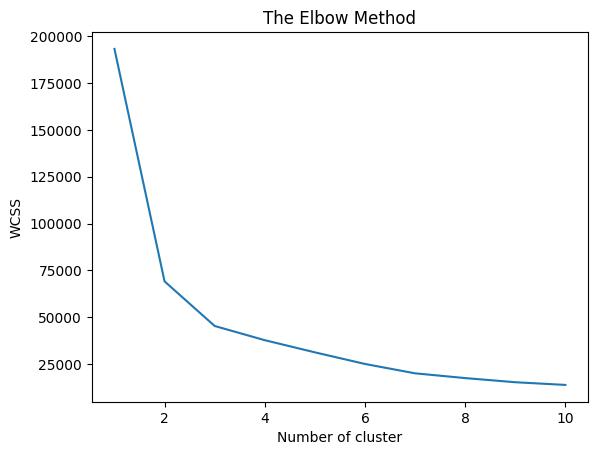

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(X_Clustor)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
wcss

[193191.97719999994,
 69158.61674679127,
 45353.1806846031,
 37775.18809464165,
 31290.162654129188,
 25088.478379706445,
 20091.25768262411,
 17548.362875163868,
 15337.89638629446,
 13900.728651541458]

In [ ]:
# Apply K-means Algo
model=KMeans(n_clusters=5,random_state=42)
y_pred=model.fit_predict(X_Clustor)
print(y_pred)

[1 1 0 ... 0 3 0]


In [ ]:
print(model.cluster_centers_)

[[9.59259259e+00 3.11939369e+04]
 [9.37819253e+00 7.08128013e+04]
 [9.41362764e+00 1.06525963e+04]
 [9.27223427e+00 9.03291045e+04]
 [9.55336788e+00 5.10702038e+04]]


In [ ]:
# Number of cust in each cluster
pred_df=pd.DataFrame(y_pred.tolist())
pred_df.value_counts()

,count
0,
0,1052
2,1038
1,1014
4,966
3,930


In [ ]:
data['Cluster_Num']=y_pred

In [ ]:
data.head(1)

,Message Type,Charges Bearer,Remittance Information,Status,Exchange Rate (if applicable),Purpose Code,Instruction for Creditor Agent,Creditor BIC,Debtor BIC,Debtor County,Debtor State,Creditor County,Creditor State,Payment_Currency,Payment_Amount,Sender_Charge_Currency,Sender_Charge_Amount,Intermediary_Charge_Currency,Intermediary_Charge_Amount,Cluster_Num
0,0,0,2,2,0.9547,2,13,19,18,3033,12,3812,11,0,19368.73,0,183.98,0,20.42,2


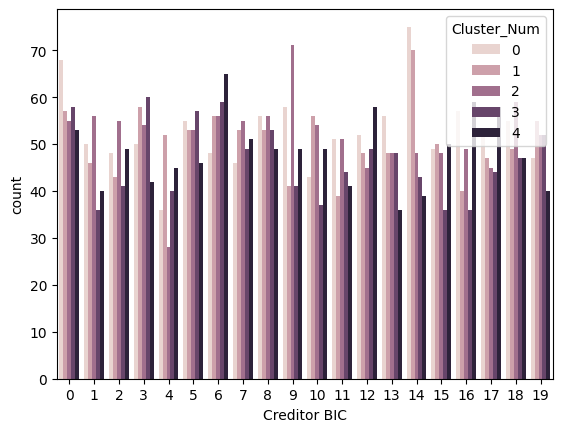

In [ ]:
sns.countplot(x='Creditor BIC', hue='Cluster_Num', data=data)
plt.show()

In [ ]:
#data[(data['Spending Score (1-100)'] > 40)]
# cond selection
#data[(data['Gender']=='Male') & (data['Cluster_Num']==1)]
X


,Message Type,Charges Bearer,Remittance Information,Exchange Rate (if applicable),Purpose Code,Instruction for Creditor Agent,Creditor BIC,Debtor BIC,Debtor County,Debtor State,Creditor County,Creditor State,Payment_Currency,Payment_Amount,Sender_Charge_Currency,Sender_Charge_Amount,Intermediary_Charge_Currency,Intermediary_Charge_Amount
0,0,0,2,0.9547,2,13,19,18,3033,12,3812,11,0,19368.73,0,183.98,0,20.42
1,0,1,5,0.5580,2,9,15,5,4137,55,3668,12,4,62508.36,4,381.04,4,134.56
2,1,0,7,0.9752,2,14,3,8,4319,39,817,17,4,34418.85,4,46.14,4,72.85
3,1,2,3,1.1252,1,5,9,8,1785,48,4064,44,1,9898.03,1,67.23,1,197.92
4,1,1,4,1.1432,2,13,10,11,2502,49,852,33,2,47985.16,2,90.47,2,139.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,2,6,0.9425,7,9,8,17,3803,56,3609,2,4,67061.36,4,423.37,4,190.8
4996,1,0,3,0.8959,3,5,3,10,3861,7,2199,44,4,80618.04,4,283.39,4,117.02
4997,1,2,5,0.8817,0,8,0,7,3510,35,2063,15,0,21939.57,0,489.09,0,107.41
4998,1,0,2,0.7732,5,11,18,12,3568,4,1492,9,0,29657.09,0,311.42,0,68.77


In [ ]:
model.labels_


array([2, 1, 0, ..., 0, 0, 4], dtype=int32)

In [ ]:
X.columns

Index(['Message Type', 'Charges Bearer', 'Remittance Information',
       'Exchange Rate (if applicable)', 'Purpose Code',
       'Instruction for Creditor Agent', 'Creditor BIC', 'Debtor BIC',
       'Debtor County', 'Debtor State', 'Creditor County', 'Creditor State',
       'Payment_Currency', 'Payment_Amount', 'Sender_Charge_Currency',
       'Sender_Charge_Amount', 'Intermediary_Charge_Currency',
       'Intermediary_Charge_Amount'],
      dtype='object')

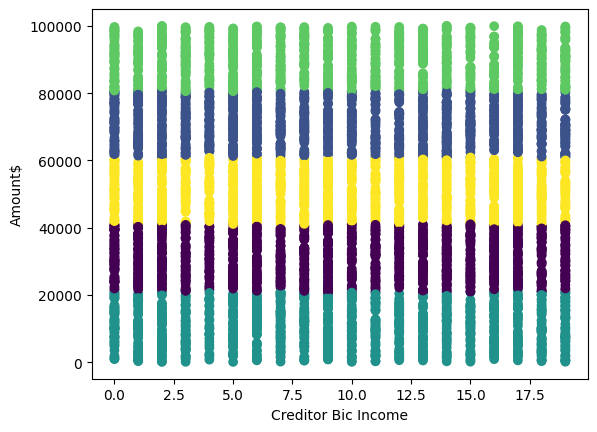

In [ ]:
plt.scatter(X['Creditor BIC'],X['Payment_Amount'],c=y_pred)
plt.xlabel('Creditor Bic Income')
plt.ylabel('Amount$')
plt.show()

**Charge Bearer Vs Intermetiary Charges **

In [ ]:
# create X
#X_Clustor_Data = data[['Purpose Code','Payment_Amount']]
X_Clustor_Data = data[['Payment_Currency','Sender_Charge_Currency']]

X_Clustor_Data.head()

,Payment_Currency,Sender_Charge_Currency
0,0,0
1,4,4
2,4,4
3,1,1
4,2,2


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:

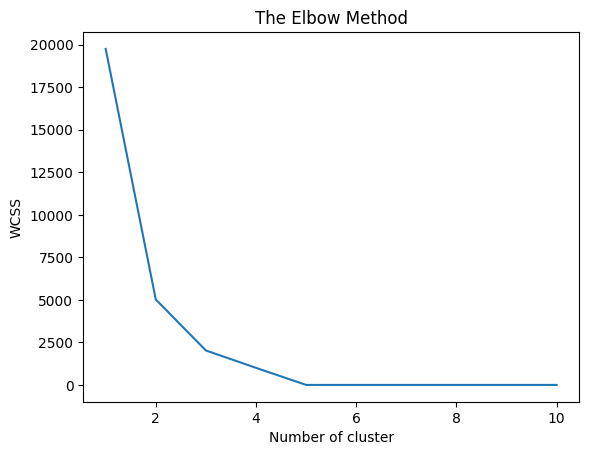

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(X_Clustor_Data)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Apply K-means Algo
model=KMeans(n_clusters=5,random_state=42)
y_pred=model.fit_predict(X_Clustor_Data)
print(y_pred)

[1 2 2 ... 1 1 2]


In [ ]:
y_pred

array([1, 2, 2, ..., 1, 1, 2], dtype=int32)

In [ ]:
data['Cluster_Num_Charge']=y_pred


In [ ]:
pred_df=pd.DataFrame(y_pred.tolist())
pred_df.value_counts()

,count
0,
3,1028
0,1012
1,1012
4,996
2,952


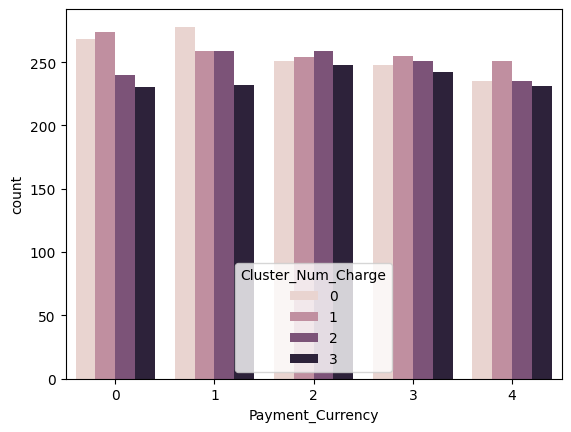

In [ ]:
#sns.countplot(x='Purpose Code', hue='Cluster_Num_Charge', data=data)
sns.countplot(x='Payment_Currency', hue='Cluster_Num_Charge', data=data)
plt.show()

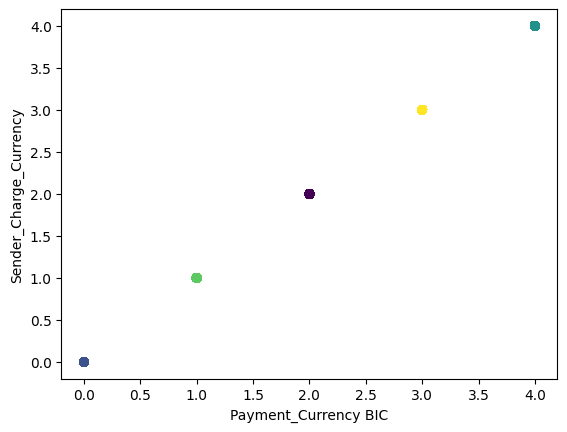

In [ ]:
#plt.scatter(data['Purpose Code'],data['Payment_Amount'],c=y_pred)
#plt.xlabel('Creditor BIC')
#plt.ylabel('Charges Bearer')
#plt.show()

plt.scatter(data['Payment_Currency'],data['Sender_Charge_Currency'],c=y_pred)
plt.xlabel('Payment_Currency BIC')
plt.ylabel('Sender_Charge_Currency')
plt.show()

In [ ]:
y_kmeans=model.fit_predict(X_Clustor_Data)

In [ ]:
model.cluster_centers_

array([[2.00000000e+00, 2.00000000e+00],
       [4.24105195e-14, 4.24105195e-14],
       [4.00000000e+00, 4.00000000e+00],
       [1.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.00000000e+00]])

In [ ]:
model.cluster_centers_[:, 0]

array([2.00000000e+00, 4.24105195e-14, 4.00000000e+00, 1.00000000e+00,
       3.00000000e+00])

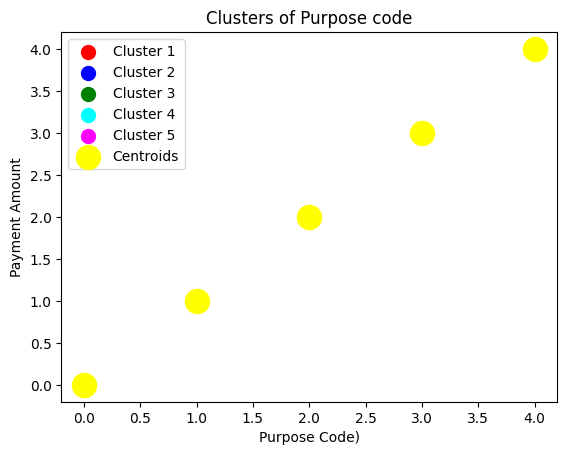

In [ ]:
y_kmeans=model.fit_predict(X_Clustor_Data)
# Visualize the clusters
plt.scatter(X_Clustor_Data.iloc[y_kmeans == 0, 0], X_Clustor_Data.iloc[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_Clustor_Data.iloc[y_kmeans == 1, 0], X_Clustor_Data.iloc[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_Clustor_Data.iloc[y_kmeans == 2, 0], X_Clustor_Data.iloc[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_Clustor_Data.iloc[y_kmeans == 3, 0], X_Clustor_Data.iloc[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_Clustor_Data.iloc[y_kmeans == 4, 0], X_Clustor_Data.iloc[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Purpose code')
plt.xlabel('Purpose Code)')
plt.ylabel('Payment Amount')
plt.legend()
plt.show()

In [ ]:
X_Clustor_Data

,Payment_Currency,Sender_Charge_Currency
0,0,0
1,4,4
2,4,4
3,1,1
4,2,2
...,...,...
4995,4,4
4996,4,4
4997,0,0
4998,0,0
